Тестирование различных конфигураций трансформера для задачи перевода текста с русского на английский

# Задание Lite

Взяв за основу практический ноутбук занятия, восстановите архитектуру трансформера и обучите модель на той же базе данных.

Попробуйте обучить трансформер на 15 эпохах с количеством голов:
* num_heads = 1
* num_heads = 4
* num_heads = 8

Сравните результаты работы трансформеров с разным количеством голов и напишите выводы.

In [ ]:
# Ваше решение


In [ ]:
# датасет от tensorfolw, перевод португальских фраз на английский
import tensorflow_datasets as tfds 

# tensorflow
import tensorflow as tf 

# модуль отвечает за время и обработку временнЫх переменных
import time 

# numpy
import numpy as np 

# для отрисовки картинок в колабе
import matplotlib.pyplot as plt 

In [ ]:
examples, metadata = tfds.load('ted_hrlr_translate/pt_to_en', 
                               with_info=True, 
                               as_supervised=True)

# разделяем на обучающую и тестовую выборки
train_examples, val_examples = examples['train'], examples['validation'] 

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incompleteVQDB92/ted_hrlr_translate-train.tfrecord


  0%|          | 0/51785 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incompleteVQDB92/ted_hrlr_translate-validation.tfrecord


  0%|          | 0/1193 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incompleteVQDB92/ted_hrlr_translate-test.tfrecord


  0%|          | 0/1803 [00:00<?, ? examples/s]

Dataset ted_hrlr_translate downloaded and prepared to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0. Subsequent calls will reuse this data.


In [ ]:
print(type(train_examples))
ex1, ex2 = train_examples.take(2)
pt, en = ex1
print(str(pt),str(en))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
tf.Tensor(b'e quando melhoramos a procura , tiramos a \xc3\xbanica vantagem da impress\xc3\xa3o , que \xc3\xa9 a serendipidade .', shape=(), dtype=string) tf.Tensor(b'and when you improve searchability , you actually take away the one advantage of print , which is serendipity .', shape=(), dtype=string)


In [ ]:
[pt.numpy() for pt, en in train_examples.take(10)]


[b'e quando melhoramos a procura , tiramos a \xc3\xbanica vantagem da impress\xc3\xa3o , que \xc3\xa9 a serendipidade .',
 b'mas e se estes fatores fossem ativos ?',
 b'mas eles n\xc3\xa3o tinham a curiosidade de me testar .',
 b'e esta rebeldia consciente \xc3\xa9 a raz\xc3\xa3o pela qual eu , como agn\xc3\xb3stica , posso ainda ter f\xc3\xa9 .',
 b"`` `` '' podem usar tudo sobre a mesa no meu corpo . ''",
 b"`` eu escrevo muito acerca do `` '' teatro de seguran\xc3\xa7a '' '' , que s\xc3\xa3o produtos que fazem as pessoas sentirem-se seguras mas que , na realidade , n\xc3\xa3o fazem nada . ''",
 b'colocaram-no bem no fundo duma mina de ferro no minnesota , nos \xc3\xbaltimos dois dias anunciaram os resultados mais sens\xc3\xadveis at\xc3\xa9 agora .',
 b'algumas pessoas t\xc3\xaam medo de que n\xc3\xa3o gostem delas .',
 b'n\xc3\xa3o , o que nos aconteceu , chris , \xc3\xa9 que o poder , o pre\xc3\xa7o est\xc3\xa1 fixado fora da margem .',
 b'de volta \xc3\xa0 minha pergunta : porque

In [ ]:
[en.numpy() for pt, en in train_examples.take(10)]

[b'and when you improve searchability , you actually take away the one advantage of print , which is serendipity .',
 b'but what if it were active ?',
 b"but they did n't test for curiosity .",
 b'and this conscious defiance is why i , as an agnostic , can still have faith .',
 b'you can use everything on the table on me .',
 b"`` i write a lot about `` '' security theater , '' '' which are products that make people feel secure , but do n't actually do anything . ''",
 b"and they 've put it deep down in an iron mine in minnesota , ok , deep under the ground , and in fact , in the last couple of days announced the most sensitive results so far .",
 b'see , some people might fear girls not liking them back .',
 b"no , what happened to us , chris , is that power , it 's priced off the margin .",
 b'back to my question : why did i stay ?']

In [ ]:
tokenizer_en = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    (en.numpy() for pt, en in train_examples), target_vocab_size=2**13)

tokenizer_pt = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    (pt.numpy() for pt, en in train_examples), target_vocab_size=2**13)

In [ ]:
# тестовая фраза
sample_string = 'cuanto cuesta la manzana?'#'Transformer is complicated.' 

# перегоним слова в токены
tokenized_string = tokenizer_pt.encode(sample_string) 
print ('Tokenized string is {}'.format(tokenized_string))

# перегоним токены обратно в слова
original_string = tokenizer_pt.decode(tokenized_string) 
print ('The original string: {}'.format(original_string))

# распишем какой токен чему соответсвует
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer_pt.decode([ts]))) 

# а точно исходная фраза соответствует дважды перекодированной?
assert original_string == sample_string 

Tokenized string is [741, 7932, 7990, 741, 54, 338, 477, 2792, 8055, 8021]
The original string: cuanto cuesta la manzana?
741 ----> cu
7932 ----> anto
7990 ---->  
741 ----> cu
54 ----> esta 
338 ----> la 
477 ----> man
2792 ----> zan
8055 ----> a
8021 ----> ?


In [ ]:
print(tokenizer_pt.vocab_size)
print(tokenizer_en.vocab_size)

8214
8087


In [ ]:
def encode(lang1, lang2):
  lang1 = [tokenizer_pt.vocab_size] + tokenizer_pt.encode(
      lang1.numpy()) + [tokenizer_pt.vocab_size+1]

  lang2 = [tokenizer_en.vocab_size] + tokenizer_en.encode(
      lang2.numpy()) + [tokenizer_en.vocab_size+1]
  
  return lang1, lang2

In [ ]:
def tf_encode(pt, en):
  result_pt, result_en = tf.py_function(encode, [pt, en], [tf.int64, tf.int64])
  result_pt.set_shape([None])
  result_en.set_shape([None])

  return result_pt, result_en

In [ ]:
# размер буффеа в памяти при приготовления датасета
BUFFER_SIZE = 20000 

# размер батча
BATCH_SIZE = 64  

# ограничим максимальную длину фразу
MAX_LENGTH = 40  

In [ ]:
def filter_max_length(x, y, max_length=MAX_LENGTH):
    
  return tf.logical_and(tf.size(x) <= max_length, # вернем маску, она уберет впоследствии длииные фразы
                        tf.size(y) <= max_length)

In [ ]:
ex1=train_examples.take(1)
print(ex1.batch(1))

<BatchDataset shapes: ((None,), (None,)), types: (tf.string, tf.string)>


In [ ]:
# Прогоняем тектсы через токенайзер
train_dataset = train_examples.map(tf_encode) 

# Убираем длинные фразу
train_dataset = train_dataset.filter(filter_max_length) 

# cache the dataset to memory to get a speedup while reading from it.

# Грузим в память
train_dataset = train_dataset.cache() 

# Делим на батчи и перемешиваем
train_dataset = train_dataset.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE) 

# Кешируем датасет
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE) 

val_dataset = val_examples.map(tf_encode)
val_dataset = val_dataset.filter(filter_max_length).padded_batch(BATCH_SIZE)

In [ ]:
pt_batch, en_batch = next(iter(val_dataset))

pt_batch, en_batch

(<tf.Tensor: shape=(64, 38), dtype=int64, numpy=
 array([[8214,  342, 3032, ...,    0,    0,    0],
        [8214,   95,  198, ...,    0,    0,    0],
        [8214, 4479, 7990, ...,    0,    0,    0],
        ...,
        [8214,  584,   12, ...,    0,    0,    0],
        [8214,   59, 1548, ...,    0,    0,    0],
        [8214,  118,   34, ...,    0,    0,    0]])>,
 <tf.Tensor: shape=(64, 40), dtype=int64, numpy=
 array([[8087,   98,   25, ...,    0,    0,    0],
        [8087,   12,   20, ...,    0,    0,    0],
        [8087,   12, 5453, ...,    0,    0,    0],
        ...,
        [8087,   18, 2059, ...,    0,    0,    0],
        [8087,   16, 1436, ...,    0,    0,    0],
        [8087,   15,   57, ...,    0,    0,    0]])>)

In [ ]:
def get_angles(pos, i, d_model):
    
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

In [ ]:
print(np.sin(get_angles(0,np.arange(10),10)))
print(np.sin(get_angles(1,np.arange(10),10)))
print(np.sin(get_angles(2,np.arange(10),10)))
print(np.sin(get_angles(3,np.arange(10),10)))


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[8.41470985e-01 8.41470985e-01 1.57826640e-01 1.57826640e-01
 2.51162229e-02 2.51162229e-02 3.98106119e-03 3.98106119e-03
 6.30957303e-04 6.30957303e-04]
[0.90929743 0.90929743 0.31169715 0.31169715 0.0502166  0.0502166
 0.00796206 0.00796206 0.00126191 0.00126191]
[0.14112001 0.14112001 0.45775455 0.45775455 0.07528529 0.07528529
 0.01194293 0.01194293 0.00189287 0.00189287]


In [ ]:
def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
  pos_encoding = angle_rads[np.newaxis, ...]
    
  return tf.cast(pos_encoding, dtype=tf.float32)

(1, 10, 100)


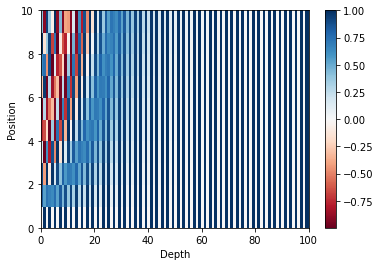

In [ ]:
pos_encoding = positional_encoding(10, 100)
print (pos_encoding.shape)

plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 100))
plt.ylabel('Position')
plt.colorbar()
plt.show()

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model = 512, num_heads = 8, causal=False, dropout=0.0):

    super(MultiHeadAttention, self).__init__()  # здесь все головы считаем паралелльно - поэтому attention пробегает и  по батчу и по числу голов

    assert d_model % num_heads == 0 # проверим, что размерность головы - целое цисло
    depth = d_model // num_heads    # размерность каждой головы внимания  =>>  multi-headed_depth = depth / num_heads
                                    # заметим, что выходы голов конкатенируются, поэтому их размер в их число раз меньше.
                                    # поэтому размерность выхода должно совпасть в размерностью входа

    self.w_query = tf.keras.layers.Dense(d_model)                            # dense для Query  (batch_size , seq_length, depth) 
    self.split_reshape_query = tf.keras.layers.Reshape((-1,num_heads,depth)) # слой для решейпа query до  (batch_size , seq_length, num_heads, multi_headed_depth)  
    self.split_permute_query = tf.keras.layers.Permute((2,1,3))              # слой для перестановки размерностей для использования Attention (batch_size , num_heads, seq_length, multi_headed_depth) 

    self.w_value = tf.keras.layers.Dense(d_model)
    self.split_reshape_value = tf.keras.layers.Reshape((-1,num_heads,depth))
    self.split_permute_value = tf.keras.layers.Permute((2,1,3))

    self.w_key = tf.keras.layers.Dense(d_model)
    self.split_reshape_key = tf.keras.layers.Reshape((-1,num_heads,depth))
    self.split_permute_key = tf.keras.layers.Permute((2,1,3))

    self.attention = tf.keras.layers.Attention(causal=causal, dropout=dropout) # прописывает слой Attention
    self.join_permute_attention = tf.keras.layers.Permute((2,1,3))             # слой обратной перестановки размерностей
    self.join_reshape_attention = tf.keras.layers.Reshape((-1,d_model))        # слой обратного решейпа до размернсти модели

    self.dense = tf.keras.layers.Dense(d_model)

  def call(self, inputs, mask=None, training=None): # основная рабочая функция

    q = inputs[0]                           # вытащим входной вектор Query
    v = inputs[1]                           # вытащим входной вектор Value
    k = inputs[2] if len(inputs) > 2 else v # вытащим входной вектор Key

    query = self.w_query(q)                   # прогоним через dense
    query = self.split_reshape_query(query)   # решейпим
    query = self.split_permute_query(query)   # переставляем размерность

    value = self.w_value(v)                 # прогоним через dense
    value = self.split_reshape_value(value) # решейпим
    value = self.split_permute_value(value) # переставляем размерность

    key = self.w_key(k)               # прогоним через dense
    key = self.split_reshape_key(key) # решейпим
    key = self.split_permute_key(key) # переставляем размерность

    if mask is not None: # применим маску если есть 

      if mask[0] is not None:
        mask[0] = tf.keras.layers.Reshape((-1,1))(mask[0])
        mask[0] = tf.keras.layers.Permute((2,1))(mask[0])
      
      if mask[1] is not None:
        mask[1] = tf.keras.layers.Reshape((-1,1))(mask[1])
        mask[1] = tf.keras.layers.Permute((2,1))(mask[1])

    attention = self.attention([query, value, key], mask=mask) # вычисляем векторо внимания
    attention = self.join_permute_attention(attention)         # обратно перемешиваем размерности
    attention = self.join_reshape_attention(attention)         # решейпим до (batch_size , seq_length, depth) 

    x = self.dense(attention) # выходной dense

    return x

In [ ]:
class EncoderLayer(tf.keras.layers.Layer): 

  def __init__(self,  d_model = 512, num_heads = 8, dff = 2048, dropout = 0.0):
    super(EncoderLayer, self).__init__()

    self.multi_head_attention =  MultiHeadAttention(d_model, num_heads)  # определим слой  MultiHeadAttention
    self.dropout_attention = tf.keras.layers.Dropout(dropout)            # добавим дропаут
    self.add_attention = tf.keras.layers.Add()                           # слой для получения resudial связи
    self.layer_norm_attention = tf.keras.layers.LayerNormalization(epsilon=1e-6)  # слой нормализации

    self.dense1 = tf.keras.layers.Dense(dff, activation='relu')               # первый dense в Feed Forward
    self.dense2 = tf.keras.layers.Dense(d_model)                              # второй  dense в Feed Forward
    self.dropout_dense = tf.keras.layers.Dropout(dropout)                     # добавим дропаут
    self.add_dense = tf.keras.layers.Add()                                    # слой для получения resudial связи
    self.layer_norm_dense = tf.keras.layers.LayerNormalization(epsilon=1e-6)  # слой нормализации

  def call(self, inputs, mask=None, training=None):
    
    # print(mask)

    # входной вектор input размножим до 3  - это query, value, key и отдадим attenton, с маской если есть 
    attention = self.multi_head_attention([inputs,inputs,inputs], mask = [mask,mask]) 
    
    # уменьшим переобучение дроаутом
    attention = self.dropout_attention(attention, training = training) 
    
    # сделаем resudial связь - добавим входной вектор
    x = self.add_attention([inputs , attention]) 
    
    # далее нормализация в масштабах уровня
    x = self.layer_norm_attention(x)  
    # x = inputs

    ## добавим Feed Forward  
    
    # проходим 1й dense с активашкой relu
    dense = self.dense1(x) 
    
    # второй dense без активашки т.е. с линейной активационной функцией
    dense = self.dense2(dense)  
    
    # добавляем дропаут
    dense = self.dropout_dense(dense, training = training)  
    
    # еще одна resudial связь
    x = self.add_dense([x , dense])  
    
    # нормализация в масштабах уровня
    x = self.layer_norm_dense(x)  

    return x

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):

  def __init__(self,  d_model = 512, num_heads = 8, dff = 2048, dropout = 0.0):

    super(DecoderLayer, self).__init__()

    self.multi_head_attention1 =  MultiHeadAttention(d_model, num_heads, causal = True) # определим слой  MultiHeadAttention
    self.dropout_attention1 = tf.keras.layers.Dropout(dropout)                          # добавим дропаут
    self.add_attention1 = tf.keras.layers.Add()                                         # слой для получения resudial связи
    self.layer_norm_attention1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)       # слой нормализации

    self.multi_head_attention2 =  MultiHeadAttention(d_model, num_heads)                # определим слой  MultiHeadAttention 
    self.dropout_attention2 = tf.keras.layers.Dropout(dropout)                          # добавим дропаут
    self.add_attention2 = tf.keras.layers.Add()                                         # слой для получения resudial связи
    self.layer_norm_attention2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)       # слой нормализации


    self.dense1 = tf.keras.layers.Dense(dff, activation='relu')              # первый dense в Feed Forward
    self.dense2 = tf.keras.layers.Dense(d_model)                             # второй  dense в Feed Forward
    self.dropout_dense = tf.keras.layers.Dropout(dropout)                    # добавим дропаут
    self.add_dense = tf.keras.layers.Add()                                   # слой для получения resudial связи
    self.layer_norm_dense = tf.keras.layers.LayerNormalization(epsilon=1e-6) # слой нормализации

  def call(self, inputs, mask=None, training=None):
    
    # print(mask)
    
    # подадим на multi-head attention  Query, Key, Value вектора - здесь это один и тотже вектор
    attention = self.multi_head_attention1([inputs[0],inputs[0],inputs[0]], mask = [mask[0],mask[0]])
    
    # пробежим дропаут
    attention = self.dropout_attention1(attention, training = training)
    
    # пробросим Resudial-связь
    x = self.add_attention1([inputs[0] , attention])
    
    # выполним нормализацию
    x = self.layer_norm_attention1(x)
    
    # второй multi-head attention. Подаем выход предыдущих слоев x и выход от энкодера, маску (если есть)
    attention = self.multi_head_attention2([x, inputs[1],inputs[1]], mask = [mask[0],mask[1]])
    
    # прогоняем через дропаут
    attention = self.dropout_attention2(attention, training = training)
    
    # пробросим Resudial-связь
    x = self.add_attention1([x , attention])
    
    # выполним нормализацию
    x = self.layer_norm_attention1(x)

    ## Feed Forward
    
    # 1 -dense + relu
    dense = self.dense1(x)

    # 2 dense +linear
    dense = self.dense2(dense)

    # прогоняем через дропаут
    dense = self.dropout_dense(dense, training = training)

    # пробросим Resudial-связь
    x = self.add_dense([x , dense])

    # выполним нормализацию
    x = self.layer_norm_dense(x)

    return x

In [ ]:
class Encoder(tf.keras.layers.Layer):

  def __init__(self, input_vocab_size, num_layers = 4, d_model = 512, num_heads = 8, dff = 2048, maximum_position_encoding = 10000, dropout = 0.0):
    
    super(Encoder, self).__init__()

    self.d_model = d_model

    self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model, mask_zero=True)                           # пропишем слой Embedding
    self.pos = positional_encoding(maximum_position_encoding, d_model)                                              # функция позиционного кодирования
    self.encoder_layers = [ EncoderLayer(d_model = d_model, num_heads = num_heads, dff = dff, dropout = dropout) for _ in range(num_layers)] # список Nx слоев кодера 
    self.dropout = tf.keras.layers.Dropout(dropout)                                                                 # просто дропаут

  def call(self, inputs, mask=None, training=None):
    
    # входной эмбеддинг  
    x = self.embedding(inputs) 
    
    # позиционное кодирование
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))  #
    x += self.pos[: , :tf.shape(x)[1], :]
    
    # прогоняем через дроаут
    x = self.dropout(x, training=training)

    # Encoder layer

    # входной слой embedding+ Позиционное кодирование
    embedding_mask = self.embedding.compute_mask(inputs)

    # прогоним через Nx слоев кодера
    for encoder_layer in self.encoder_layers: 
      x = encoder_layer(x, mask = embedding_mask)

    return x

  # Закомментируйте код ниже, если хотите использовать masked_loss()
  def compute_mask(self, inputs, mask=None):
    return self.embedding.compute_mask(inputs)

In [ ]:
class Decoder(tf.keras.layers.Layer):

  def __init__(self, target_vocab_size, num_layers = 4, d_model = 512, num_heads = 8, dff = 2048, maximum_position_encoding = 10000, dropout = 0.0):
    
    super(Decoder, self).__init__()

    self.d_model = d_model

    self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model, mask_zero=True) # пропишем слой Embedding
    self.pos = positional_encoding(maximum_position_encoding, d_model)                     # функция позиционного кодирования
    self.decoder_layers = [ DecoderLayer(d_model = d_model, num_heads = num_heads, dff = dff, dropout = dropout)  for _ in range(num_layers)] # список Nx слоев декодера 
    self.dropout = tf.keras.layers.Dropout(dropout)                                        # просто дропаут

  def call(self, inputs, mask=None, training=None):
    
    # выполним переход в эмбеддинг
    x = self.embedding(inputs[0]) 
    
    # позиционное кодирование
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos[: , :tf.shape(x)[1], :]
    
    # просто dropout
    x = self.dropout(x, training=training)

    # Decoder layer
    
    # входной слой embedding + Позиционное кодирование
    embedding_mask = self.embedding.compute_mask(inputs[0])

    # прогоним через Nx слоев декодера
    for decoder_layer in self.decoder_layers:
      x = decoder_layer([x,inputs[1]], mask = [embedding_mask, mask])

    return x

  # Закомментируйте код ниже, если хотите использовать masked_loss()
  def compute_mask(self, inputs, mask=None):
    return self.embedding.compute_mask(inputs[0])

In [ ]:
num_layers = 4
d_model = 128
dff = 512
num_heads = 8

dropout_rate = 0.1

input_vocab_size = tokenizer_pt.vocab_size + 2
target_vocab_size = tokenizer_en.vocab_size + 2


input  = tf.keras.layers.Input(shape=(None,)) # входной слой для переводимой фразы
target = tf.keras.layers.Input(shape=(None,)) # вход для перевода
encoder = Encoder(input_vocab_size, num_layers = num_layers, d_model = d_model, num_heads = num_heads, dff = dff, dropout = dropout_rate) # весь кодер
decoder = Decoder(target_vocab_size, num_layers = num_layers, d_model = d_model, num_heads = num_heads, dff = dff, dropout = dropout_rate) #весь декодер

# собираем модель 
x = encoder(input)
x = decoder([target, x] , mask = encoder.compute_mask(input))
x = tf.keras.layers.Dense(target_vocab_size)(x)

model = tf.keras.models.Model(inputs=[input, target], outputs=x)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 encoder_1 (Encoder)            (None, None, 128)    1844736     ['input_3[0][0]']                
                                                                                                  
 tf.math.not_equal_1 (TFOpLambd  (None, None)        0           ['input_3[0][0]']                
 a)                                                                                         

(64, 40, 8089)

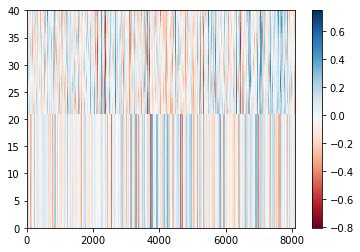

In [ ]:
pt_batch, en_batch = next(iter(val_dataset))

plt.pcolormesh(model.predict([pt_batch,en_batch])[5],cmap='RdBu')
plt.colorbar()

model.predict([pt_batch,en_batch]).shape

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)
    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
# оптимайзер 
optimizer = tf.keras.optimizers.Adam(CustomSchedule(d_model), beta_1=0.9, beta_2=0.98, 
                                     epsilon=1e-9)
# функция потерь
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def masked_loss(y_true, y_pred):

  # считаем маску  
  mask = tf.math.logical_not(tf.math.equal(y_true, 0))
  _loss = loss(y_true, y_pred)
  #print(mask)
  mask = tf.cast(mask, dtype=_loss.dtype)

  # накинем маску на потери  
  _loss *= mask

  return tf.reduce_sum(_loss)/tf.reduce_sum(mask)

metrics = [loss, masked_loss, tf.keras.metrics.SparseCategoricalAccuracy()]

model.compile(optimizer=optimizer, loss = loss, metrics = metrics) # masked_

In [ ]:
num_batches = 0
for (batch, (_,_)) in enumerate(train_dataset):
  num_batches = batch
print(num_batches)

val_batches = 0
for (batch, (_,_)) in enumerate(val_dataset):
  val_batches = batch
print(val_batches)

702
16


In [ ]:
def generator(data_set):
    
  while True:
    for pt_batch, en_batch in data_set:
      yield ( [pt_batch , en_batch[:, :-1] ] , en_batch[:, 1:] )
      #print("generator",np.shape(pt_batch),pt_batch[0],np.shape(en_batch),en_batch[0])

In [ ]:
#num head = 16
history = model.fit(x = generator(train_dataset), validation_data = generator(val_dataset), epochs=20, steps_per_epoch = num_batches, validation_steps = val_batches)

Epoch 1/20
702/702 [==============================] - 140s 176ms/step - loss: 3.5098 - sparse_categorical_crossentropy: 7.0210 - masked_loss: 7.1679 - sparse_categorical_accuracy: 0.1334 - val_loss: 2.5925 - val_sparse_categorical_crossentropy: 5.2837 - val_masked_loss: 5.5839 - val_sparse_categorical_accuracy: 0.2582
Epoch 2/20
702/702 [==============================] - 119s 170ms/step - loss: 2.3963 - sparse_categorical_crossentropy: 4.8128 - masked_loss: 5.0814 - sparse_categorical_accuracy: 0.2935 - val_loss: 2.1901 - val_sparse_categorical_crossentropy: 4.4635 - val_masked_loss: 4.7210 - val_sparse_categorical_accuracy: 0.3334
Epoch 3/20
702/702 [==============================] - 120s 171ms/step - loss: 2.1418 - sparse_categorical_crossentropy: 4.3115 - masked_loss: 4.5529 - sparse_categorical_accuracy: 0.3437 - val_loss: 2.0297 - val_sparse_categorical_crossentropy: 4.1365 - val_masked_loss: 4.3751 - val_sparse_categorical_accuracy: 0.3678
Epoch 4/20
702/702 [====================

In [ ]:
history = model.fit(x = generator(train_dataset), validation_data = generator(val_dataset), epochs=40, steps_per_epoch = num_batches, validation_steps = val_batches)

Epoch 1/40
702/702 [==============================] - 119s 170ms/step - loss: 0.7385 - sparse_categorical_crossentropy: 1.4863 - masked_loss: 1.5695 - sparse_categorical_accuracy: 0.6798 - val_loss: 1.1367 - val_sparse_categorical_crossentropy: 2.3166 - val_masked_loss: 2.4502 - val_sparse_categorical_accuracy: 0.6207
Epoch 2/40
702/702 [==============================] - 119s 170ms/step - loss: 0.7063 - sparse_categorical_crossentropy: 1.4165 - masked_loss: 1.4958 - sparse_categorical_accuracy: 0.6902 - val_loss: 1.1252 - val_sparse_categorical_crossentropy: 2.2931 - val_masked_loss: 2.4254 - val_sparse_categorical_accuracy: 0.6220
Epoch 3/40
702/702 [==============================] - 118s 169ms/step - loss: 0.6739 - sparse_categorical_crossentropy: 1.3529 - masked_loss: 1.4286 - sparse_categorical_accuracy: 0.6996 - val_loss: 1.1294 - val_sparse_categorical_crossentropy: 2.3017 - val_masked_loss: 2.4345 - val_sparse_categorical_accuracy: 0.6240
Epoch 4/40
702/702 [====================

KeyboardInterrupt: ignored

In [ ]:
#num head = 8
history = model.fit(x = generator(train_dataset), validation_data = generator(val_dataset), epochs=20, steps_per_epoch = num_batches, validation_steps = val_batches)

Epoch 1/20
702/702 [==============================] - 126s 158ms/step - loss: 3.4954 - sparse_categorical_crossentropy: 7.0209 - masked_loss: 7.1829 - sparse_categorical_accuracy: 0.1202 - val_loss: 2.6624 - val_sparse_categorical_crossentropy: 5.4261 - val_masked_loss: 5.7342 - val_sparse_categorical_accuracy: 0.2335
Epoch 2/20
702/702 [==============================] - 107s 153ms/step - loss: 2.4460 - sparse_categorical_crossentropy: 4.9082 - masked_loss: 5.1823 - sparse_categorical_accuracy: 0.2796 - val_loss: 2.2231 - val_sparse_categorical_crossentropy: 4.5307 - val_masked_loss: 4.7921 - val_sparse_categorical_accuracy: 0.3234
Epoch 3/20
702/702 [==============================] - 108s 153ms/step - loss: 2.1747 - sparse_categorical_crossentropy: 4.3730 - masked_loss: 4.6180 - sparse_categorical_accuracy: 0.3360 - val_loss: 2.0228 - val_sparse_categorical_crossentropy: 4.1225 - val_masked_loss: 4.3602 - val_sparse_categorical_accuracy: 0.3717
Epoch 4/20
702/702 [====================

In [ ]:
#num head = 4
def generator(data_set):
history = model.fit(x = generator(train_dataset), validation_data = generator(val_dataset), epochs=20, steps_per_epoch = num_batches, validation_steps = val_batches)

Epoch 1/20
702/702 [==============================] - 122s 151ms/step - loss: 3.5061 - sparse_categorical_crossentropy: 7.0478 - masked_loss: 7.2020 - sparse_categorical_accuracy: 0.1175 - val_loss: 2.7002 - val_sparse_categorical_crossentropy: 5.5031 - val_masked_loss: 5.8163 - val_sparse_categorical_accuracy: 0.2232
Epoch 2/20
702/702 [==============================] - 102s 146ms/step - loss: 2.4715 - sparse_categorical_crossentropy: 4.9621 - masked_loss: 5.2393 - sparse_categorical_accuracy: 0.2723 - val_loss: 2.2404 - val_sparse_categorical_crossentropy: 4.5660 - val_masked_loss: 4.8294 - val_sparse_categorical_accuracy: 0.3153
Epoch 3/20
702/702 [==============================] - 102s 145ms/step - loss: 2.1996 - sparse_categorical_crossentropy: 4.4218 - masked_loss: 4.6696 - sparse_categorical_accuracy: 0.3283 - val_loss: 2.0600 - val_sparse_categorical_crossentropy: 4.1984 - val_masked_loss: 4.4405 - val_sparse_categorical_accuracy: 0.3624
Epoch 4/20
702/702 [====================

In [ ]:
#num head = 1
def generator(data_set):
history = model.fit(x = generator(train_dataset), validation_data = generator(val_dataset), epochs=20, steps_per_epoch = num_batches, validation_steps = val_batches)

Epoch 1/20
702/702 [==============================] - 114s 140ms/step - loss: 3.5457 - sparse_categorical_crossentropy: 7.1255 - masked_loss: 7.2743 - sparse_categorical_accuracy: 0.0933 - val_loss: 2.7728 - val_sparse_categorical_crossentropy: 5.6511 - val_masked_loss: 5.9713 - val_sparse_categorical_accuracy: 0.2080
Epoch 2/20
702/702 [==============================] - 94s 134ms/step - loss: 2.5290 - sparse_categorical_crossentropy: 5.0694 - masked_loss: 5.3522 - sparse_categorical_accuracy: 0.2592 - val_loss: 2.2909 - val_sparse_categorical_crossentropy: 4.6689 - val_masked_loss: 4.9382 - val_sparse_categorical_accuracy: 0.3009
Epoch 3/20
702/702 [==============================] - 94s 134ms/step - loss: 2.2715 - sparse_categorical_crossentropy: 4.5640 - masked_loss: 4.8196 - sparse_categorical_accuracy: 0.3044 - val_loss: 2.1949 - val_sparse_categorical_crossentropy: 4.4734 - val_masked_loss: 4.7314 - val_sparse_categorical_accuracy: 0.3137
Epoch 4/20
702/702 [======================

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
#model.save('/content/drive/My Drive/NN/model_Transformers_8h.h5')  # creates a HDF5 file 'my_model.h5'
model.save_weights('/content/drive/My Drive/NN/model_weight_Transformers_16h.h5');

In [ ]:

model.load_weights('/content/drive/My Drive/NN/model_weight_Transformers_8h.h5')

Первая фраза реальный перевод, вторая перевод трансформера

In [ ]:
for i in range(10):
  translation = [tokenizer_en.vocab_size]
  for _ in range(40):
    predict = model.predict([pt_batch[i:i+1],np.asarray([translation])])
    translation.append(np.argmax(predict[-1,-1]))
    if translation[-1] == tokenizer_en.vocab_size + 1:
      break

  real_translation = []
  for w in en_batch[:,1:][i].numpy():
    if w == tokenizer_en.vocab_size + 1:
      break
    real_translation.append(w)
  print(tokenizer_en.decode(real_translation))
  print(tokenizer_en.decode(translation[1:-1]))
  print("")

did they eat fish and chips ?
did you have dinner with the friers ?

i was always worried about being caught and sent back .
i always was concerned about being caught and sent back .

i chose one with the skin color of a lobster when sunburnt .
i chose a tone with the wall of a glacier with a cage .

but i think this is quite clearly untrue .
but i think this is clearly fake .

we have measured our progress very rigorously .
we have the measurement of our own progressive progress .

and from what i feel , it 's a cure for me , but for us all .
and in my opinion , it 's a cure not just for me , but for everyone .

it 's a work in progress from a personal story to a global history .
it 's a work in a global history of a global history for a global history .

i mean , it 's just a losing proposition .
i mean , it 's a blind proposition .

so , how do we have these conversations more easily and more often ?
so how do we have these conversations more easily and more times ?

and issue rogue

Вывод Чем больше голов тем сильнее падает функция потерь, если сделать 16 голов становится хуже сеть переучивается.